# COVID-19 Visualizations

These are some quick sample visualizations. More advanced ones can be found in the PowerBI file.

In [1]:
# Authored by A Wan, 2021. All rights reserved.

# Imports
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [2]:
# Define Constants
DAYS_TO_PLOT = 60  # how many of the most recent days of data should be plotted

# Constants
on_age_groups = {"0-17": 2762885, "18-29": 2455535, "30-39": 2056059, "40-49": 1876583, "50-59": 2060934,
                 "60-69": 1795046, "70-79": 1159902, "80+": 679266, 'all_ages': 14789778, 'adults': 12026893}

age_ranges = ["0-17", "18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "all_ages"]

vaccine_groups = ["full", "atleast1"]

## Vaccination Data

In [3]:
# First API Call - Get vaccine data by age group
data = requests.get('https://api.covid19tracker.ca/vaccines/age-groups/province/ON').json()['data']

In [4]:
# Convert the data into readable dataframes
vaccination_by_age_dfs = [pd.DataFrame(columns=age_ranges) for group in vaccine_groups]
adults_dfs = [pd.Series(dtype=float) for group in vaccine_groups]


for e in data:
    d = pd.read_json(e['data'])
    for idx, group in enumerate(vaccine_groups):
        s = d.loc[group]
        adults_dfs[idx][e['date']] = 100 * (s['all_ages'] - s['0-17']) / on_age_groups['adults']
        # continuously appending to DataFrames is not ideal, but this is a side project and the dataset is small
        vaccination_by_age_dfs[idx] = vaccination_by_age_dfs[idx].append(
            pd.Series(data={k: 100 * v / on_age_groups[k] for k, v in s.items()}, name=e['date']))

adults_dfs = pd.DataFrame({'Fully Vaccinated': adults_dfs[0], 'At Least One Dose': adults_dfs[1]})

### Adult Vaccination
The following chart shows data for the vaccination of adults in Ontario.

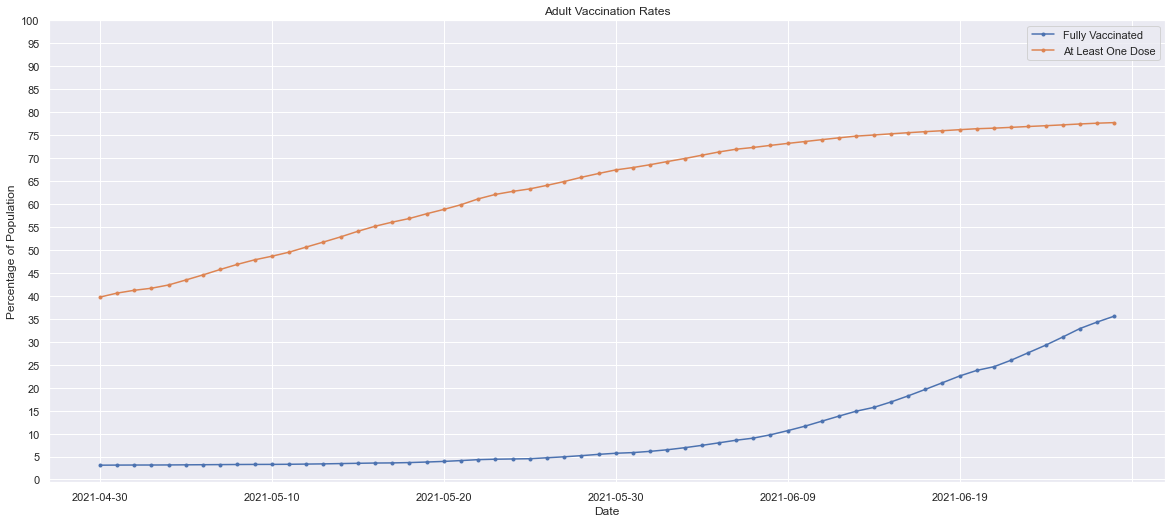

In [5]:
# Plot the most recent days of data for all vaccination statuses for adults only (18+)
d = adults_dfs.tail(DAYS_TO_PLOT)
ax = d.plot(title='Adult Vaccination Rates', marker='.', xlabel='Date', ylabel='Percentage of Population',
            figsize=(20, 8.5), yticks=np.arange(0, 105, 5), legend=True)

### Vaccination by Age Group
The following chart shows data for the vaccination by age group of all people in Ontario.

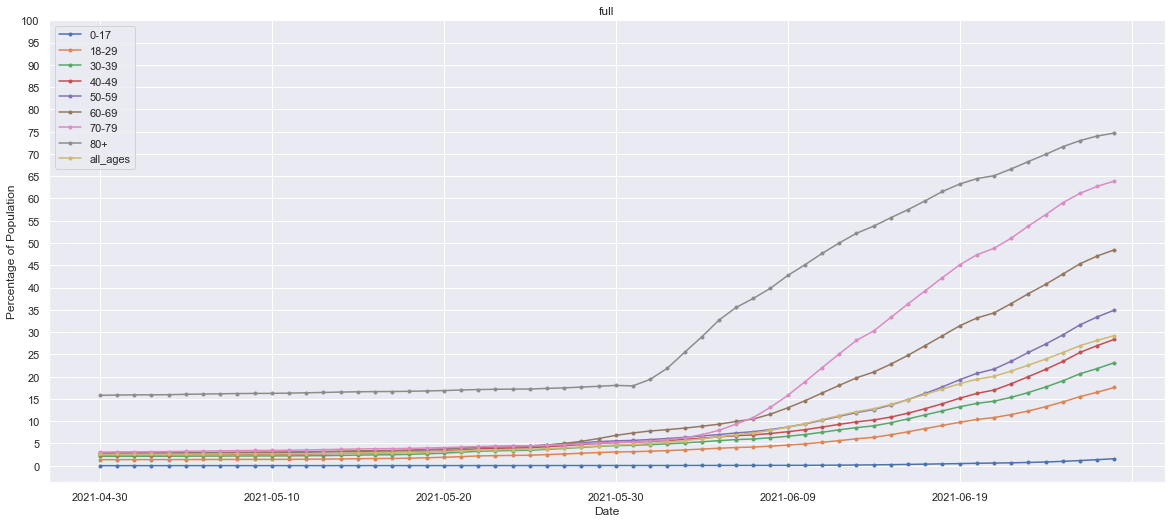

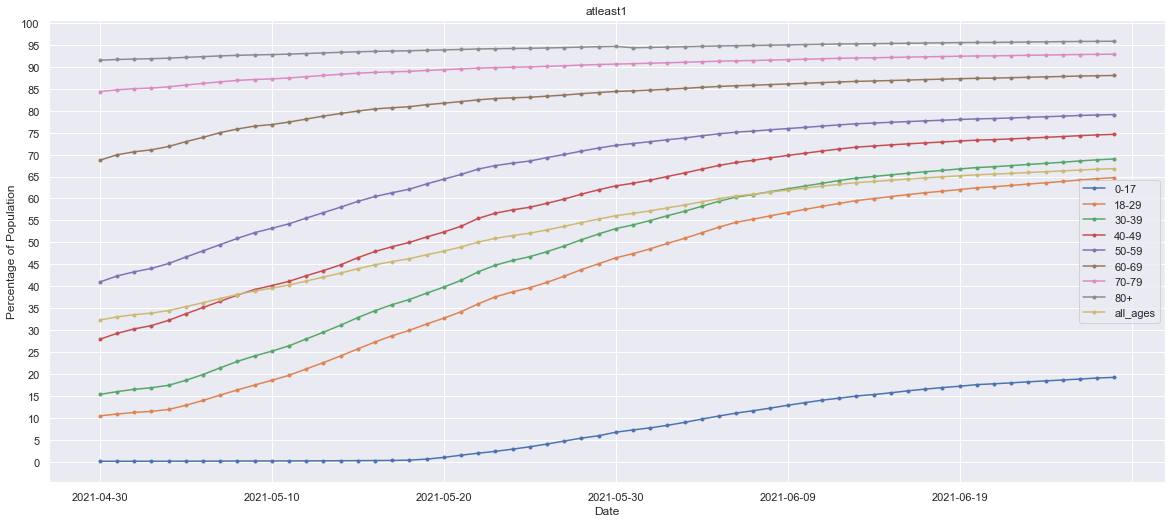

In [6]:
# Plot the most recent days of data for all vaccination statuses
for idx, df in enumerate(vaccination_by_age_dfs):
    d = df.tail(DAYS_TO_PLOT)
    d.plot(title=vaccine_groups[idx], marker='.', xlabel='Date', ylabel='Percentage of Population', figsize=(20, 8.5),
           yticks=np.arange(0, 105, 5))

## COVID-19 Details

Get all details of COVID-19 in Ontario, including case counts, hospitlizations, etc.

In [7]:
# Get COVID-19 info
data = requests.get('https://api.covid19tracker.ca/reports/province/on').json()['data']
details_df = pd.DataFrame(data)

### Active Cases
Calculate and plot active cases in Ontario.

In [8]:
details_df['active_cases'] = details_df['total_cases'] - details_df['total_fatalities'] - details_df['total_recoveries']

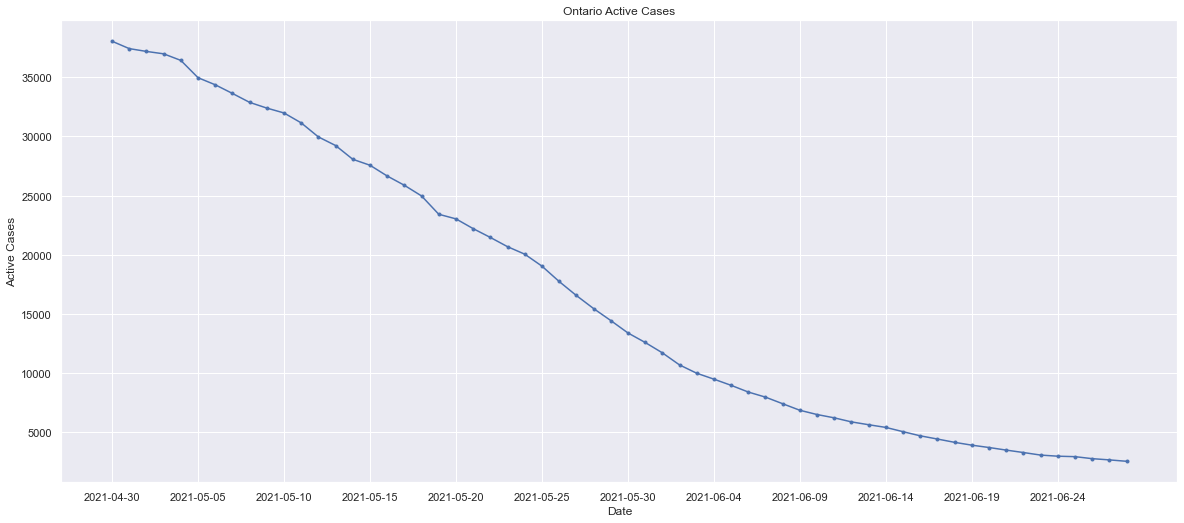

In [9]:
fig = plt.figure(figsize=(20, 8.5))
ax = fig.add_subplot(1, 1, 1)
d = details_df.tail(DAYS_TO_PLOT)
dates = d['date'].to_list()
plt.plot(dates, d['active_cases'], marker='.')
plt.xticks(dates[::5])
plt.title('Ontario Active Cases')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.show()